### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [73]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [74]:
print(data.isna().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [75]:
#replacing all NaN values with a value "Missing Value"
cleaned_data = data.fillna('Missing Value')

4. What proportion of the total observations chose to accept the coupon?



In [76]:
coupon_acceptance_rate = (cleaned_data["Y"].mean()*100).round(2)
print("proportion of the total observations chose to accept the coupon = " , coupon_acceptance_rate)

proportion of the total observations chose to accept the coupon =  56.84


5. Use a bar plot to visualize the `coupon` column.

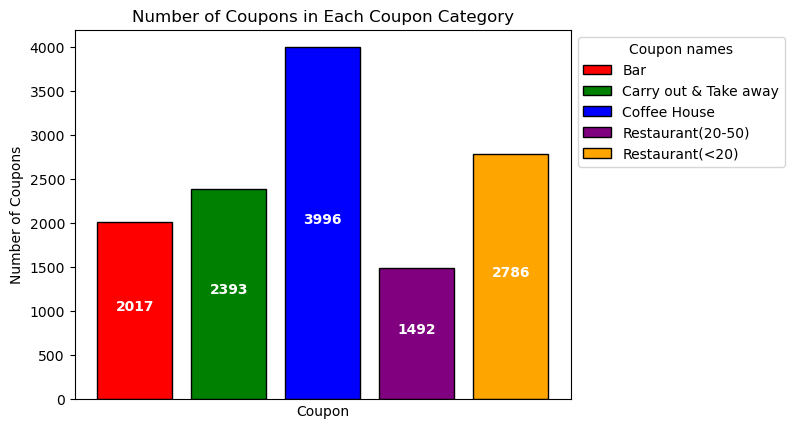

In [9]:
import matplotlib.pyplot as plt
coupon_counts = cleaned_data['coupon'].value_counts().sort_index()
coupon_names = coupon_counts.index
Number_of_coupons = coupon_counts.values
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue', 'purple', 'orange']
bars = ax.bar(coupon_names, Number_of_coupons,color=colors,edgecolor='black')
ax.set_xticks([])
ax.set_xticklabels([])
legend_labels = coupon_names.tolist()
ax.legend(bars, legend_labels, title="Coupon names",loc='best',bbox_to_anchor=(1, 1))
ax.bar_label(bars, label_type='center', padding=3, color='white', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Coupons')
ax.set_xlabel('Coupon')
ax.set_title('Number of Coupons in Each Coupon Category')
plt.show()
plt.savefig(f"images/KR_number_of_coupons.png", dpi=300, bbox_inches='tight')
plt.close()

6. Use a histogram to visualize the temperature column.

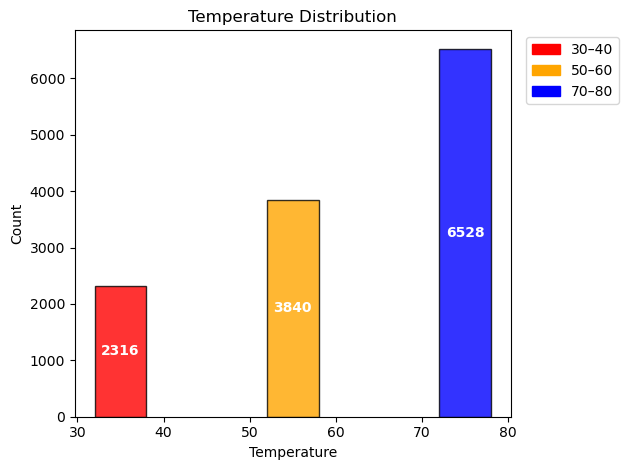

In [11]:
import matplotlib.pyplot as plt
temp_data = cleaned_data['temperature']
# histogram parameters
n_bins = 5
colors = ["red", "orange", "blue"]
default_color = "purple"
# Create the figure and axis
fig, ax = plt.subplots()

# Draw histogram (no per-bar color sequence here)
counts, bin_edges, patches = ax.hist(
    temp_data,
    bins=n_bins,
    edgecolor='black',
    alpha=0.8,
    rwidth=0.6,
)
# Color visible (non-empty) bins and record their labels
visible_bin_labels = []
visible_colors = []
for i, (count, patch) in enumerate(zip(counts, patches)):
    if count > 0:
        # Format range label (e.g., "45–50")
        label = f"{int(bin_edges[i])}–{int(bin_edges[i+1])}"
        visible_bin_labels.append(label)

        # Assign colors only to bins that appear
        if len(visible_colors) < len(colors):
            patch.set_facecolor(colors[len(visible_colors)])
            visible_colors.append(colors[len(visible_colors)])
        else:
            patch.set_facecolor(default_color)
            visible_colors.append(default_color)
    else:
        # Empty bins (count == 0) are hidden automatically, skip them
        patch.set_alpha(0)
        
# Add count labels centered in each bar
for count, left, right in zip(counts, bin_edges[:-1], bin_edges[1:]):
    if count == 0:
        continue
    x_center = (left + right) / 2
    y_text = count / 2
    ax.text(x_center, y_text, f'{int(count)}', ha='center', va='center',
            color='white', fontsize=10, fontweight='bold')

# Create legend only for displayed (non-empty) bins
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in visible_colors]
ax.legend(handles, visible_bin_labels, loc='upper left', bbox_to_anchor=(1.02, 1.0))

# Labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')
ax.set_title('Temperature Distribution')

# Tight layout so the plot + legend fit nicely
plt.tight_layout()
plt.show()
plt.savefig(f"images/KR_temparature_distribution.png", dpi=300, bbox_inches='tight')
plt.close()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
unique_coupons[0]

'Bar'

In [15]:
unique_coupons = sorted(cleaned_data['coupon'].unique()) 
def coupon_analyis_question_1_solution(coupon_analyis_q1_input_df,coupon_name):
    coupon_analyis_q1_output_df = coupon_analyis_q1_input_df[coupon_analyis_q1_input_df['coupon'] == coupon_name].copy()
    return coupon_analyis_q1_output_df
cpn = unique_coupons[0]
coupon_df = coupon_analyis_question_1_solution(cleaned_data,cpn)

2. What proportion of bar coupons were accepted?


In [19]:
def coupon_analyis_question_2_solution(coupon_analyis_q2_input_df,coupon_name):
    global all_coupon_results_dict
    #print("Question 2 : What proportion of " + coupon_name +" coupons were accepted?\n")
    coupon_acceptance_rate = coupon_analyis_q2_input_df["Y"].mean()
    #print(f"Proportion of {coupon_name} coupons accepted: {coupon_acceptance_rate:.2%}\n")
    analysis_condition = "Overall Coupon Accpetance Rate"
    coupon_acceptance_rate = (coupon_acceptance_rate*100).round(2)
    coupon_analyis_question_2_answer = pd.DataFrame(
        {"Coupon":coupon_name,
         "percentage": [coupon_acceptance_rate],
         "analysis_condition" : [analysis_condition]},
          index=["analysis_condition"]
    )
    return 
coupon_analyis_question_2_solution(coupon_df,cpn)
print ("proportion of bar coupons were accepted = ",coupon_acceptance_rate, "%")

proportion of bar coupons were accepted =  56.84 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
def convert_series_to_dataframe(sdata,column_name,coupon_name):
    df = sdata.to_frame(name=column_name)
    df["percentage"] = (df["Y"]*100).round(2)
    df = df.drop('Y', axis=1)
    df["Coupon"] = coupon_name
    df.index.name = "analysis_condition"
    df.reset_index(inplace=True)  # make index a column for merging later
    return df
def coupon_analyis_question_3_solution(coupon_analyis_q3_input_df,coupon_name):
   #print("Question -3 Compare the acceptance rate between those who went to a "+ coupon_name+" 3 or fewer times a month to those who went more.\n")
    low_freq = ["never", "less1", "1~3"]
    high_freq = ["4~8", "gt8"]
    # Create a new column for frequency group
    coupon_visit_group = coupon_name+"_visit_group"
    coupon_analyis_q3_input_df[coupon_visit_group] = coupon_analyis_q3_input_df[coupon_name].apply(
        lambda x: "Coupon_accpetance for " + coupon_name +" Visits Per Month <= 3" if x in low_freq else ("Coupon_accpetance for " + coupon_name +" Visits Per Month > 3 per month" if x in high_freq else None)
    )
    coupon_analyis_q3_input_df = coupon_analyis_q3_input_df.dropna(subset=[coupon_visit_group])
    acceptance_by_group = coupon_analyis_q3_input_df.groupby(coupon_visit_group)["Y"].mean()
    acceptance_colname = "Y"
    coupon_analyis_question_3_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
    #all_coupon_results_dict[f"{coupon_name}_Q3"] = coupon_analyis_question_3_answer
    acceptance_percentage_less_than_3_visits = coupon_analyis_question_3_answer.iloc[0, 1]
    acceptance_percentage_greater_than_3_visits = coupon_analyis_question_3_answer.iloc[1, 1]
    print(f"{coupon_name} Visits Per Month <= 3 is = {acceptance_percentage_less_than_3_visits:.2f}%\n")
    print(f"{coupon_name} Visits Per Month > 3 is = {acceptance_percentage_greater_than_3_visits:.2f}%\n")
    if (acceptance_percentage_greater_than_3_visits > acceptance_percentage_less_than_3_visits):
        print("Acceptance rate between those who went to a bar 3 or fewer times a month is less than to those who went more")
    else:
         print("Acceptance rate between those who went to a bar 3 or fewer times a month is greater than to those who went more")
    return
coupon_analyis_question_3_solution(coupon_df,cpn)

Bar Visits Per Month <= 3 is = 37.06%

Bar Visits Per Month > 3 is = 76.88%

Acceptance rate between those who went to a bar 3 or fewer times a month is less than to those who went more


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
def coupon_analyis_question_4_solution(coupon_analyis_q4_input_df,coupon_name):
    #print("Question -4 Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?.")
    # Clean and standardize bar frequency values
    more_than_once = ["1~3", "4~8", "gt8"]
    
    # Convert age column to numeric (extract number from strings like '26', '50plus')
    coupon_analyis_q4_input_df["age_num"] = coupon_analyis_q4_input_df["age"].str.extract("(\d+)").astype(float)
    
    # Define two groups:
    # 1. drivers/customers who visit the establishment more than once per month AND whose age > 25
    # 2. Everyone else
    condition = (coupon_analyis_q4_input_df[coupon_name].isin(more_than_once)) & (coupon_analyis_q4_input_df["age_num"] > 25)
    
    # Create a new group label
    coupon_analyis_q4_input_df["analysis_condition"] = condition.map({True: "Visits Per Month > 1 & Age>25", False: "(VisitsPerMonth ≤ 1) & (Age ≤ 25)"})
    
    # Calculate acceptance rate (Y=1) for each group
    acceptance_by_group = coupon_analyis_q4_input_df.groupby("analysis_condition")["Y"].mean()
    acceptance_colname = "Y"
    coupon_analyis_question_4_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
    #all_coupon_results_dict[f"{coupon_name}_Q4"] = coupon_analyis_question_4_answer
    visits_gt_1_and_age_gt_25 = coupon_analyis_question_4_answer.iloc[0, 1]
    visits_all_others = coupon_analyis_question_4_answer.iloc[1,1]
    print(f"{coupon_name} visits_gt_1_and_age_gt_25 is = {visits_gt_1_and_age_gt_25:.2f}%\n")
    print(f"{coupon_name} visits_all_others is = {visits_all_others:.2f}%\n")
    return
coupon_analyis_question_4_solution(coupon_df,cpn)

Bar visits_gt_1_and_age_gt_25 is = 33.50%

Bar visits_all_others is = 69.52%



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
def coupon_analyis_question_5_solution(coupon_analyis_q5_input_df,coupon_name):
    # Clean and standardize establishment visit frequency values
	more_than_once = ["1~3", "4~8", "gt8"]

	# Convert age column to numeric (extract number from strings like '26', '50plus')
	coupon_analyis_q5_input_df["age_num"] = coupon_analyis_q5_input_df["age"].str.extract("(\d+)").astype(float)

	# Define the condition:
	# - Goes to the establishment more than once a month
	# - Passenger is not a kid
	# - Occupation is not farming, fishing, or forestry
	condition = (
		coupon_analyis_q5_input_df[coupon_name].isin(more_than_once) &
		(coupon_analyis_q5_input_df["passanger"] != "Kid(s)") &
		(coupon_analyis_q5_input_df["occupation"] != "Farming Fishing & Forestry")
	)

	# Define two groups:
	# 1. Establishment visits more than once a month AND  had passengers that were not a kid and had occupations other than farming, fishing, or forestry
	# 2. Everyone else
    
	condition.map({True:"Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry)", False: "Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry)"})
	
	# Create a new group label
	coupon_analyis_q5_input_df["analysis_condition"] = condition.map({True: "Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry)", False: "Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry)"})

	# Calculate acceptance rate (Y=1) for each group
	acceptance_by_group = coupon_analyis_q5_input_df.groupby("analysis_condition")["Y"].mean()
	acceptance_colname = "Y"
	coupon_analyis_question_5_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
	#all_coupon_results_dict[f"{coupon_name}_Q5"] = coupon_analyis_question_5_answer
	visits_gt_1_and_passenger_no_kids_no_farming = coupon_analyis_question_5_answer.iloc[0, 1]
	visits_all_others = coupon_analyis_question_5_answer.iloc[1,1]
	print(f"{coupon_name} Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry) = {visits_gt_1_and_passenger_no_kids_no_farming:.2f}%")
	print(f"{coupon_name} Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry) = {visits_all_others:.2f}%")
	return

coupon_analyis_question_5_solution(coupon_df,cpn)

Bar Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry) = 29.60%
Bar Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry) = 71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [48]:
def income_to_numeric(val):
    if pd.isna(val):
        return None
    # Remove $ and commas
    val = val.replace("$", "").replace(",", "").replace("K", "000").replace("+", "")
    # Handle ranges like '37500 - 49999' → take average
    if "-" in val:
        parts = val.split("-")
        try:
            low = float(parts[0].strip())
            high = float(parts[1].strip())
            return (low + high) / 2
        except:
            return None
    else:
        # Single value like '50000'
        try:
            return float(val.strip())
        except:
            return None
def coupon_analyis_question_6_solution(coupon_analyis_q6_input_df,coupon_name):
	# Clean and standardize bar frequency values
	more_than_once = ["1~3", "4~8", "gt8"]

	# Define cheap restaurant frequency meaning "more than 4 visits a month"
	more_than_4_restaurants = ["4~8", "gt8"]

	# Convert age column to numeric
	coupon_analyis_q6_input_df["age_num"] = coupon_analyis_q6_input_df["age"].str.extract("(\d+)").astype(float)

	# Convert income to numeric (remove "$" and text)
	coupon_analyis_q6_input_df["income_num"] = coupon_analyis_q6_input_df["income"].apply(income_to_numeric)
	#coupon_analyis_q6_input_df["income_num"] = coupon_analyis_q6_input_df["income"].str.replace("[$,K+]", "", regex=True).astype(float)

	# --- Define each condition clearly ---

	# Condition #1 : Goes to bar more than once a month, has passengers not kids, and not widowed
	coupon_analyis_q6_input_df_condition_1 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_once)
		& (coupon_analyis_q6_input_df["passanger"] != "Kid(s)")
		& (coupon_analyis_q6_input_df["maritalStatus"] != "Widowed")
	)

	# Condition 2: go to bars > once/month and under age 30
	coupon_analyis_q6_input_df_condition_2 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_once)
		& (coupon_analyis_q6_input_df["age_num"] < 30)
	)
    
	# Condition 3: go to cheap restaurants >4 times/month and income < $50K
	coupon_analyis_q6_input_df_condition_3 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_4_restaurants)
		& coupon_analyis_q6_input_df["income_num"]
	)

	#Calculate acceptance rates for each condition
	acceptance_rates = {
		"Visits >1 per month and passengers not a kid and Driver Not Widowed": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_1, "Y"].mean(),
		"Visits >1 and Age<30": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_2, "Y"].mean(),
		"Cheap Restarunts visists > 4 per month and Income < 50K": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_3, "Y"].mean()
	}
	coupon_analyis_question_6_answers = pd.DataFrame(list(acceptance_rates.items()), columns=["analysis_condition", "percentage"])
	for index, row in coupon_analyis_question_6_answers.iterrows():
		print(f"{row['analysis_condition']} = {row['percentage']:.2%}")
	return
coupon_analyis_question_6_solution(coupon_df,cpn)

Visits >1 per month and passengers not a kid and Driver Not Widowed = 71.32%
Visits >1 and Age<30 = 72.17%
Cheap Restarunts visists > 4 per month and Income < 50K = 75.51%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [56]:
from IPython.display import Markdown, display

hypothesis_text = """
### Hypothesis on Bar Coupon Acceptance

- Drivers who visit bars **more than 3 times per month** have a **high acceptance rate (~77%)**,  
  while infrequent visitors (≤3 times/month) show **lower acceptance (~37%)**.  

- **Older drivers (Age > 25)** are significantly more likely to accept coupons (**~70%**)  
  compared to **younger drivers (≤25 years)** who show **~33% acceptance**.  

- Drivers **without children**, **not widowed**, and **not working in farming, fishing, or forestry**  
  are also strong responders, showing **~71% acceptance**.  

- **Frequent diners** who visit inexpensive restaurants more than 4 times a month  
  and have **income under $50K** display one of the **highest acceptance rates (~75%)**.  

- In contrast, **less social, younger, or family-bound drivers** are less likely to engage  
  with bar-related coupons.  

---

**Overall Insight:**  
Bar coupon campaigns are most effective when **targeted at socially active, middle-income adults**  
who frequently visit bars and casual dining places.
"""
display(Markdown(hypothesis_text))



### Hypothesis on Bar Coupon Acceptance

- Drivers who visit bars **more than 3 times per month** have a **high acceptance rate (~77%)**,  
  while infrequent visitors (≤3 times/month) show **lower acceptance (~37%)**.  

- **Older drivers (Age > 25)** are significantly more likely to accept coupons (**~70%**)  
  compared to **younger drivers (≤25 years)** who show **~33% acceptance**.  

- Drivers **without children**, **not widowed**, and **not working in farming, fishing, or forestry**  
  are also strong responders, showing **~71% acceptance**.  

- **Frequent diners** who visit inexpensive restaurants more than 4 times a month  
  and have **income under $50K** display one of the **highest acceptance rates (~75%)**.  

- In contrast, **less social, younger, or family-bound drivers** are less likely to engage  
  with bar-related coupons.  

---

**Overall Insight:**  
Bar coupon campaigns are most effective when **targeted at socially active, middle-income adults**  
who frequently visit bars and casual dining places.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [72]:
response_text = """
### Analysis Overview: Coupon Acceptance Across all Coupon Types

- Provided a complete codebase below which performs comprehensive analysis for **all coupon types** in the dataset, not limited to Bar coupons.  
- Results are saved in the **data** folder . Name of output file is  **`KR_PA1_coupon_data_analysis_output.txt`** with the **pipe (`|`) delimiter**.  
- Coupon insights are manually generated and stored in **coupon_insights.json** in the **configs** folder . The insights are generated based on the result from EDA and individual coupon data analysis and used in visualizations.
- Visualizations are generated for all conditions specified for each coupon type and stored in the **`images`** folder. 
- Visualization generated for overall coupon summary with total acceptance rate for each coupon and it is stored in the images folder with file name **`KR_Overall_Coupon_Summary.png`**
- In addition, a **heatmap summarizing acceptance rates** across all coupon types is produced and saved in the same folder, offering a clear overview of coupon engagement patterns.
- Graph images for Question #5 and #6 in general data analysis section is also stored in the **`images`** folder.
"""

display(Markdown(response_text))


### Analysis Overview: Coupon Acceptance Across all Coupon Types

- Provided a complete codebase below which performs comprehensive analysis for **all coupon types** in the dataset, not limited to Bar coupons.  
- Results are saved in the **data** folder . Name of output file is  **`KR_PA1_coupon_data_analysis_output.txt`** with the **pipe (`|`) delimiter**.  
- Coupon insights are manually generated and stored in **coupon_insights.json** in the **configs** folder . The insights are generated based on the result from EDA and individual coupon data analysis and used in visualizations.
- Visualizations are generated for all conditions specified for each coupon type and stored in the **`images`** folder. 
- Visualization generated for overall coupon summary with total acceptance rate for each coupon and it is stored in the images folder with file name **`KR_Overall_Coupon_Summary.png`**
- In addition, a **heatmap summarizing acceptance rates** across all coupon types is produced and saved in the same folder, offering a clear overview of coupon engagement patterns.
- Graph images for Question #5 and #6 in general data analysis section is also stored in the **`images`** folder.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import json
import textwrap
from matplotlib.patches import Patch
from textwrap import wrap
from pathlib import Path
from matplotlib.ticker import FixedLocator


#Global Variables
data = pd.DataFrame()
cleaned_data = pd.DataFrame()
all_coupon_results_dict = {}
overall_acceptance_entire_dataset = {}
#pd.set_option('display.float_format', '{:.2f}'.format)

#********************** Utility functions - start ****************************
def generic_coupon_information_display(coupon_name):
    display_message = coupon_name+" coupon Analysis...."
    print(display_message)
    return
def convert_series_to_dataframe(sdata,column_name,coupon_name):
    df = sdata.to_frame(name=column_name)
    df["percentage"] = (df["Y"]*100).round(2)
    df = df.drop('Y', axis=1)
    df["Coupon"] = coupon_name
    df.index.name = "analysis_condition"
    df.reset_index(inplace=True)  # make index a column for merging later
    return df
def income_to_numeric(val):
    if pd.isna(val):
        return None
    # Remove $ and commas
    val = val.replace("$", "").replace(",", "").replace("K", "000").replace("+", "")
    # Handle ranges like '37500 - 49999' → take average
    if "-" in val:
        parts = val.split("-")
        try:
            low = float(parts[0].strip())
            high = float(parts[1].strip())
            return (low + high) / 2
        except:
            return None
    else:
        # Single value like '50000'
        try:
            return float(val.strip())
        except:
            return None

# Function to compute perceived brightness for label color
def get_label_color(hex_color):
	rgb = mcolors.to_rgb(hex_color)
	brightness = 0.299*rgb[0] + 0.587*rgb[1] + 0.114*rgb[2]
	return 'black' if brightness > 0.6 else 'white'
    
def wrap_labels(labels, width=65):
    return ['\n'.join(textwrap.wrap(str(l), width)) for l in labels]
    
def load_data_and_config():
    df = pd.read_csv("data/KR_PA1_coupon_data_analysis_output.txt", sep='|')
    df['Acceptance Rate'] = df['percentage'].astype(str).str.replace('%','').astype(float)
    df['Rejection rate'] = 100 - df['Acceptance Rate']
    with open("configs/coupon_insights.json") as f:
        insights = json.load(f)
    return df, insights
#********************** Utility functions - start ****************************


#******* Data Visualizations for Accpetance Vs Rejection Summary per Coupon Type - start *********
def plot_acceptance_vs_rejection(df, insights):
    Path("images").mkdir(exist_ok=True)
    sns.set_style("whitegrid")

    for coupon in df['Coupon'].unique():
        if coupon.strip().lower() == "All coupons":
            continue
        subset = df[df['Coupon'] == coupon]
        melted = pd.melt(subset, id_vars=['analysis_condition'],
                         value_vars=['Acceptance Rate','Rejection rate'],
                         var_name='Metric', value_name='Rate')

        # Dynamic figure height based on number of conditions
        fig_height = max(6, len(subset)*0.5)
        fig, ax = plt.subplots(figsize=(10, fig_height))

        sns.barplot(
            data=melted,
            y='analysis_condition', x='Rate',
            hue='Metric', palette=['#4CAF50','#F44336'],
            edgecolor='black', orient='h', ax=ax
        )

        ax.set_title(f"{coupon}: Acceptance vs Rejection Rates", fontsize=13, fontweight='bold')
        ax.set_xlabel("Acceptance Rate (%)")
        ax.set_ylabel("Analysis Condition")

        # Fix Y-axis tick positions and wrapped labels
        yticks = ax.get_yticks()
        ax.yaxis.set_major_locator(FixedLocator(yticks))
        ax.set_yticklabels(wrap_labels(subset['analysis_condition'].tolist(), 45), fontsize=5)

        # Centered bar labels
        for container in ax.containers:
            for patch, value in zip(container.patches, container.datavalues):
                if value > 0.5:  # skip very small labels
                    ax.text(patch.get_width()/2, patch.get_y() + patch.get_height()/2,
                            f"{value:.1f}%", ha='center', va='center',
                            color='white', fontsize=4, fontweight='bold')

        # Insights & recommendation below figure
        if coupon in insights:
            y_offset = -0.28
            for i, text in enumerate(insights[coupon]['insights']):
                ax.text(0.5, y_offset - i*0.05, f"• {text}", transform=ax.transAxes,
                        ha='center', va='top', fontsize=7, fontweight='bold')
            ax.text(0.5, y_offset - len(insights[coupon]['insights'])*0.05 - 0.07,
                    f"Recommendation: {insights[coupon]['recommendation']}",
                    transform=ax.transAxes, ha='center', fontsize=10, color='blue', style='italic')

        # Metric legend below plot with extra margin
        handles, labels = ax.get_legend_handles_labels()
        wrapped_labels = wrap_labels(labels, width=15)
        ax.legend(handles, wrapped_labels, title="Metric", bbox_to_anchor=(0.5,-0.50),
                  loc='upper center', ncol=2, frameon=False)

        plt.subplots_adjust(bottom=0.45, left=0.25)
        safe_coupon = coupon.replace("<","_less_than_").replace(" ","_")
        if coupon.strip().lower() != "all coupons":
            plt.savefig(f"images/KR_{safe_coupon}_Acceptance_vs_Rejection.png", dpi=300, bbox_inches='tight')
        plt.close()
    print("✅ 5 Acceptance vs Rejection graphs saved to 'images' folder ")
    return
#******* Data Visualizations for Accpetance Vs Rejection Summary per Coupon Type - End *********

#**********************Data Visualization for Overall Coupon Summary - Start ****************************
def plot_overall_coupon_summary(df, insights,wt_cpn_acp_rate):
    Path("images").mkdir(exist_ok=True)
    sns.set_style("whitegrid")

    # --- Filter for Overall data ---
    overall = df[df["analysis_condition"].str.contains("Overall", case=False)].copy()
    if overall.empty:
        print("⚠️ No 'Overall' data found.")
        return

    # --- Setup plot ---
    plt.clf()
    fig, ax = plt.subplots(figsize=(9, 5.5))

    # --- Bar plot ---
    ax = sns.barplot(
        data=overall,
        x="Coupon",
        y="Acceptance Rate",
        hue="Coupon",
        palette="Set2",
        dodge=False,
        edgecolor="black",
        legend=False,
        ax=ax
    )

    # --- Add bar labels ---
    for p in ax.patches:
        height = p.get_height()
        if height > 0.1:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height / 2,
                f"{height:.1f}%",
                ha="center",
                va="center",
                color="white",
                fontsize=8
            )

    # --- Axis styling ---
    ax.set_title("Overall Coupon Acceptance by Type", fontsize=10)
    ax.set_ylabel("Acceptance Rate (%)", fontsize=8)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.text(
        0.5,
        -0.12,
        "Coupon Type",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=9,
        color="black"
    )

    # --- Legend ---
    palette = sns.color_palette("Set2", len(overall))
    legend_elements = [Patch(facecolor=c, label=n) for c, n in zip(palette, overall["Coupon"])]
    leg = ax.legend(
        handles=legend_elements,
        title="Coupon Type",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        frameon=True,
        fontsize=8,
        title_fontsize=8
    )
    leg.get_frame().set_edgecolor("black")
    leg.get_frame().set_linewidth(0.6)

    # --- Insights + Recommendations ---
    block = insights.get("Overall Coupon Acceptance Rate", {})
    insight_texts = list(block.get("insights", []))
    reco_text = block.get("recommendation", "")

    avg_acceptance = overall["Acceptance Rate"].mean()
    weighted_overall = 57.5  # placeholder (>50)
    yes_no = "Yes" if weighted_overall > 50 else "No"

    # Update last two insights
    if len(insight_texts) >= 2:
        insight_texts[-2] = f"Average coupon acceptance across all coupon types ({avg_acceptance:.1f}%)"
        insight_texts[-1] = f"Weighted overall acceptance on entire dataset ({wt_cpn_acp_rate:.1f}%)"

    # --- Position texts below plot area ---
    # We'll use axes-relative coords (ax.transAxes) to anchor everything consistently
    y0 = -0.25  # starting below x-axis
    line_h = 0.08

    # Insights
    for i, txt in enumerate(insight_texts):
        color = "blue" if i >= len(insight_texts) - 2 else "black"
        ax.text(
            0.5,
            y0 - i * line_h,
            f"• {txt}",
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=8,
            color=color
        )

    # Recommendation (wrapped horizontally)
    reco_lines = wrap(reco_text, width=85)
    reco_y = y0 - len(insight_texts) * line_h - 0.12
    for j, line in enumerate(reco_lines):
        prefix = "Recommendations: " if j == 0 else ""
        ax.text(
            0.5,
            reco_y - j * 0.06,
            f"{prefix}{line}",
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=8,
            color="darkgreen",
            style="italic"
        )

    # Question + answer
    q_y = reco_y - len(reco_lines) * 0.06 - 0.12
    ax.text(
        0.5,
        q_y,
        "Will a customer accept the coupon?",
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=8,
        color="black"
    )
    ax.text(
        0.5,
        q_y - 0.06,
        yes_no,
        transform=ax.transAxes,
        ha="center",
        va="top",
        fontsize=9,
        color="green" if yes_no == "Yes" else "red"
    )

    # Adjust figure layout to show everything cleanly
    plt.subplots_adjust(bottom=0.55, right=0.82, top=0.92)
    plt.savefig("images/KR_Overall_Coupon_Summary.png", dpi=300, bbox_inches="tight")
    plt.close(fig)
    print("✅ Overall coupon summary graph saved to 'images' folder ")
    #print("✅ Overall coupon summary graph saved to 'images' folder ")
    return
#**********************Data Visualization for Overall Coupon Summary - End ****************************

#**********************Data Visualization for Accpetance Rate HeatMap - Start *************************
def plot_heatmap(df):
    Path("images").mkdir(exist_ok=True)
    pivot_df = df.pivot(index='analysis_condition', columns='Coupon', values='Acceptance Rate')

    plt.figure(figsize=(12,8))
    sns.heatmap(pivot_df, annot=True, cmap='RdYlGn', fmt=".1f", cbar_kws={'label':'Acceptance %'})
    plt.title("Acceptance Rate Heatmap by Condition and Coupon Type", fontsize=13, fontweight='bold')
    plt.ylabel("Analysis Condition")
    plt.xlabel("Coupon Type")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.savefig("images/KR_Acceptance_Heatmap.png", dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ Acceptance rate Heatmap saved to 'images' folder ")
#**********************Data Visualization for Accpetance Rate HeatMap - End *************************

#**********************Question #1 - Start ****************************
def general_question1_solution():
    global data
    data = pd.read_csv('data/coupons.csv')
    data.rename(columns={'CarryAway': 'Carry out & Take away'}, inplace=True)  
    data.rename(columns={'RestaurantLessThan20': 'Restaurant(<20)'}, inplace=True) 
    data.rename(columns={'CoffeeHouse': 'Coffee House'}, inplace=True) 
    data.rename(columns={'Restaurant20To50': 'Restaurant(20-50)'}, inplace=True) 
    print("Completed General Question #1.")
    return
#**********************Question #1  - End ****************************

#**********************Question #2  - Start ****************************
def general_question2_solution(): 
    global data
    data.isna().sum()
    print("Completed General Question #2.")
    return
#**********************Question #2  - End ****************************

#**********************Question #3 - Start ****************************
def general_question3_solution():
    global data,cleaned_data
    cleaned_data = data.fillna('Missing Value')
    print("Completed General Question #3.")
    return
#**********************Question #3  - End ****************************

#**********************Question #4 - Start ****************************    
def general_question4_solution():
    global cleaned_data,overall_acceptance_entire_dataset
    coupon_acceptance_rate = (cleaned_data["Y"].mean()*100).round(2)
    overall_acceptance_entire_dataset = {
        "Coupon": "All coupons",
        "analysis_condition": "Overall Acceptance Rate on entire dataset",
        "percentage": round(coupon_acceptance_rate, 2)
    }
    print("Completed General Question #4.")
    return coupon_acceptance_rate
    
#**********************Question #4  - End ****************************

#**********************Question #5 - Start ****************************
def general_question5_solution():
    global data,cleaned_data
    coupon_counts = cleaned_data['coupon'].value_counts().sort_index()
    coupon_names = coupon_counts.index
    Number_of_coupons = coupon_counts.values
    fig, ax = plt.subplots()
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    bars = ax.bar(coupon_names, Number_of_coupons,color=colors,edgecolor='black')
    ax.set_xticks([])
    ax.set_xticklabels([])
    legend_labels = coupon_names.tolist()
    ax.legend(bars, legend_labels, title="Coupon names",loc='best',bbox_to_anchor=(1, 1))
    ax.bar_label(bars, label_type='center', padding=3, color='white', fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Coupons')
    ax.set_xlabel('Coupon')
    ax.set_title('Number of Coupons in Each Coupon Category')
    #plt.show()
    plt.savefig(f"images/KR_number_of_coupons.png", dpi=300, bbox_inches='tight')
    plt.close()
    print("Completed General Question #5.")
    return
#**********************Question #5  - End****************************

#**********************Question #6 - Start ************************************
def general_question6_solution():
    global data,cleaned_data
    # Create histogram
    temp_data = cleaned_data['temperature']
    # histogram parameters
    n_bins = 5
    colors = ["red", "orange", "blue"]
    default_color = "purple"
    # Create the figure and axis
    fig, ax = plt.subplots()
    
    # Draw histogram (no per-bar color sequence here)
    counts, bin_edges, patches = ax.hist(
        temp_data,
        bins=n_bins,
        edgecolor='black',
        alpha=0.8,
        rwidth=0.6,
    )
    # Color visible (non-empty) bins and record their labels
    visible_bin_labels = []
    visible_colors = []
    
    for i, (count, patch) in enumerate(zip(counts, patches)):
        if count > 0:
            # Format range label (e.g., "45–50")
            label = f"{int(bin_edges[i])}–{int(bin_edges[i+1])}"
            visible_bin_labels.append(label)
    
            # Assign colors only to bins that appear
            if len(visible_colors) < len(colors):
                patch.set_facecolor(colors[len(visible_colors)])
                visible_colors.append(colors[len(visible_colors)])
            else:
                patch.set_facecolor(default_color)
                visible_colors.append(default_color)
        else:
            # Empty bins (count == 0) are hidden automatically, skip them
            patch.set_alpha(0)
        
    # Add count labels centered in each bar
    for count, left, right in zip(counts, bin_edges[:-1], bin_edges[1:]):
        if count == 0:
            continue
        x_center = (left + right) / 2
        y_text = count / 2
        ax.text(x_center, y_text, f'{int(count)}', ha='center', va='center',
                color='white', fontsize=10, fontweight='bold')
    
    # Create legend only for displayed (non-empty) bins
    handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in visible_colors]
    ax.legend(handles, visible_bin_labels, loc='upper left', bbox_to_anchor=(1.02, 1.0))
    
    # Labels and title
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Count')
    ax.set_title('Temperature Distribution')
    
    # Tight layout so the plot + legend fit nicely
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"images/KR_temparature_distribution.png", dpi=300, bbox_inches='tight')
    plt.close()
    print("Completed General Question #6.")
    return
#********************** Question #6  - End ****************************


#********************** Coupon Analysis  - Question #1 - Start ****************************
def coupon_analyis_question_1_solution(coupon_analyis_q1_input_df,coupon_name):
    #print(coupon_analyis_q1_input_df)
   # print("Question 1 : Create a new DataFrame that contains just the "+coupon_name+" coupons.")
    coupon_analyis_q1_output_df = coupon_analyis_q1_input_df[coupon_analyis_q1_input_df['coupon'] == coupon_name].copy()
    #print("Created new dataframe only with "+coupon_name+" coupons\n")
    return coupon_analyis_q1_output_df
#********************** Coupon Analysis  - Question #1 - End ****************************

#********************** Coupon Analysis  - Question #2 - Start ****************************
def coupon_analyis_question_2_solution(coupon_analyis_q2_input_df,coupon_name):
    global all_coupon_results_dict
    #print("Question 2 : What proportion of " + coupon_name +" coupons were accepted?\n")
    coupon_acceptance_rate = coupon_analyis_q2_input_df["Y"].mean()
    #print(f"Proportion of {coupon_name} coupons accepted: {coupon_acceptance_rate:.2%}\n")
    analysis_condition = "Overall Coupon Accpetance Rate"
    coupon_acceptance_rate = (coupon_acceptance_rate*100).round(2)
    coupon_analyis_question_2_answer = pd.DataFrame(
        {"Coupon":coupon_name,
         "percentage": [coupon_acceptance_rate],
         "analysis_condition" : [analysis_condition]},
          index=["analysis_condition"]
    )
    all_coupon_results_dict[f"{coupon_name}_Q2"] = coupon_analyis_question_2_answer
    return 
#********************** Coupon Analysis  - Question #2 - End ****************************

#********************** Coupon Analysis  - Question #3 - Start ****************************
def coupon_analyis_question_3_solution(coupon_analyis_q3_input_df,coupon_name):
    global all_coupon_results_dict
   #print("Question -3 Compare the acceptance rate between those who went to a "+ coupon_name+" 3 or fewer times a month to those who went more.\n")
    low_freq = ["never", "less1", "1~3"]
    high_freq = ["4~8", "gt8"]
    # Create a new column for frequency group
    coupon_visit_group = coupon_name+"_visit_group"
    coupon_analyis_q3_input_df[coupon_visit_group] = coupon_analyis_q3_input_df[coupon_name].apply(
        lambda x: "Coupon_accpetance for " + coupon_name +" Visits Per Month <= 3" if x in low_freq else ("Coupon_accpetance for " + coupon_name +" Visits Per Month > 3 per month" if x in high_freq else None)
    )
    coupon_analyis_q3_input_df = coupon_analyis_q3_input_df.dropna(subset=[coupon_visit_group])
    acceptance_by_group = coupon_analyis_q3_input_df.groupby(coupon_visit_group)["Y"].mean()
    acceptance_colname = "Y"
    coupon_analyis_question_3_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
    all_coupon_results_dict[f"{coupon_name}_Q3"] = coupon_analyis_question_3_answer
    # acceptance_percentage_less_than_3_visits = coupon_analyis_question_3_answer.iloc[0, 1]
    # acceptance_percentage_greater_than_3_visits = coupon_analyis_question_3_answer.iloc[1, 1]
    # print(f"{coupon_name} Visits Per Month <= 3 is = {acceptance_percentage_less_than_3_visits:.2f}%\n")
    # print(f"{coupon_name} Visits Per Month > 3 is = {acceptance_percentage_greater_than_3_visits:.2f}%\n")
    #custom_colors = ["#2ECC71", "#A020F0"] #Cyan and Purple
    #coupon_accpetance_visulization(coupon_analyis_question_3_answer,custom_colors)
    return
#********************** Coupon Analysis  - Question #3 - End ****************************

#********************** Coupon Analysis  - Question #4 - Start ****************************
def coupon_analyis_question_4_solution(coupon_analyis_q4_input_df,coupon_name):
    global all_coupon_results_dict
    #print("Question -4 Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?.")
    # Clean and standardize bar frequency values
    more_than_once = ["1~3", "4~8", "gt8"]
    
    # Convert age column to numeric (extract number from strings like '26', '50plus')
    coupon_analyis_q4_input_df["age_num"] = coupon_analyis_q4_input_df["age"].str.extract("(\d+)").astype(float)
    
    # Define two groups:
    # 1. drivers/customers who visit the establishment more than once per month AND whose age > 25
    # 2. Everyone else
    condition = (coupon_analyis_q4_input_df[coupon_name].isin(more_than_once)) & (coupon_analyis_q4_input_df["age_num"] > 25)
    
    # Create a new group label
    coupon_analyis_q4_input_df["analysis_condition"] = condition.map({True: "Visits Per Month > 1 & Age>25", False: "(VisitsPerMonth ≤ 1) & (Age ≤ 25)"})
    
    # Calculate acceptance rate (Y=1) for each group
    acceptance_by_group = coupon_analyis_q4_input_df.groupby("analysis_condition")["Y"].mean()
    acceptance_colname = "Y"
    coupon_analyis_question_4_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
    all_coupon_results_dict[f"{coupon_name}_Q4"] = coupon_analyis_question_4_answer
    # visits_gt_1_and_age_gt_25 = coupon_analyis_question_4_answer.iloc[0, 1]
    # visits_all_others = coupon_analyis_question_4_answer.iloc[1,1]
    return
#********************** Coupon Analysis  - Question #4 - End ****************************

#********************** Coupon Analysis  - Question #5 - Start ****************************
def coupon_analyis_question_5_solution(coupon_analyis_q5_input_df,coupon_name):
	global all_coupon_results_dict

    # Clean and standardize establishment visit frequency values
	more_than_once = ["1~3", "4~8", "gt8"]

	# Convert age column to numeric (extract number from strings like '26', '50plus')
	coupon_analyis_q5_input_df["age_num"] = coupon_analyis_q5_input_df["age"].str.extract("(\d+)").astype(float)

	# Define the condition:
	# - Goes to the establishment more than once a month
	# - Passenger is not a kid
	# - Occupation is not farming, fishing, or forestry
	condition = (
		coupon_analyis_q5_input_df[coupon_name].isin(more_than_once) &
		(coupon_analyis_q5_input_df["passanger"] != "Kid(s)") &
		(coupon_analyis_q5_input_df["occupation"] != "Farming Fishing & Forestry")
	)

	# Define two groups:
	# 1. Establishment visits more than once a month AND  had passengers that were not a kid and had occupations other than farming, fishing, or forestry
	# 2. Everyone else
    
	condition.map({True:"Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry)", False: "Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry)"})
	
	# Create a new group label
	coupon_analyis_q5_input_df["analysis_condition"] = condition.map({True: "Visits >1 per month & Passenger != kid & Occupation Not in (Farming,Fishing,Forestry)", False: "Visits <=1 per month or Passenger = kid or Occupation in (Farming,Fishing,Forestry)"})

	# Calculate acceptance rate (Y=1) for each group
	acceptance_by_group = coupon_analyis_q5_input_df.groupby("analysis_condition")["Y"].mean()
	acceptance_colname = "Y"
	coupon_analyis_question_5_answer = convert_series_to_dataframe(acceptance_by_group,acceptance_colname,coupon_name)
	all_coupon_results_dict[f"{coupon_name}_Q5"] = coupon_analyis_question_5_answer
	return
#********************** Coupon Analysis  - Question #5 - End ****************************

#********************** Coupon Analysis  - Question #6 - Start ****************************
def coupon_analyis_question_6_solution(coupon_analyis_q6_input_df,coupon_name):
	global all_coupon_results_dict

	# Clean and standardize bar frequency values
	more_than_once = ["1~3", "4~8", "gt8"]

	# Define cheap restaurant frequency meaning "more than 4 visits a month"
	more_than_4_restaurants = ["4~8", "gt8"]

	# Convert age column to numeric
	coupon_analyis_q6_input_df["age_num"] = coupon_analyis_q6_input_df["age"].str.extract("(\d+)").astype(float)

	# Convert income to numeric (remove "$" and text)
	coupon_analyis_q6_input_df["income_num"] = coupon_analyis_q6_input_df["income"].apply(income_to_numeric)
	#coupon_analyis_q6_input_df["income_num"] = coupon_analyis_q6_input_df["income"].str.replace("[$,K+]", "", regex=True).astype(float)

	# --- Define each condition clearly ---

	# Condition #1 : Goes to bar more than once a month, has passengers not kids, and not widowed
	coupon_analyis_q6_input_df_condition_1 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_once)
		& (coupon_analyis_q6_input_df["passanger"] != "Kid(s)")
		& (coupon_analyis_q6_input_df["maritalStatus"] != "Widowed")
	)

	# Condition 2: go to bars > once/month and under age 30
	coupon_analyis_q6_input_df_condition_2 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_once)
		& (coupon_analyis_q6_input_df["age_num"] < 30)
	)
    
	# Condition 3: go to cheap restaurants >4 times/month and income < $50K
	coupon_analyis_q6_input_df_condition_3 = (
		coupon_analyis_q6_input_df[coupon_name].isin(more_than_4_restaurants)
		& coupon_analyis_q6_input_df["income_num"]
	)

	#Calculate acceptance rates for each condition
	acceptance_rates = {
		"Visits >1 per month and passengers not a kid and Drivers Not Widowed": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_1, "Y"].mean(),
		"Visits >1 and Age<30": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_2, "Y"].mean(),
		"Cheap Restarunts visists > 4 per month and Income < 50K": coupon_analyis_q6_input_df.loc[coupon_analyis_q6_input_df_condition_3, "Y"].mean()
	}
	coupon_analyis_question_6_answers = pd.DataFrame(list(acceptance_rates.items()), columns=["analysis_condition", "percentage"])
	coupon_names = [coupon_name, coupon_name, coupon_name]
	coupon_analyis_question_6_answers["Coupon"] = coupon_names
	coupon_analyis_question_6_answers["percentage"] = ((coupon_analyis_question_6_answers["percentage"] * 100).round(2))
	coupon_analyis_question_6_answers = (
	coupon_analyis_question_6_answers[['Coupon', 'analysis_condition', 'percentage']]
	.set_index('analysis_condition')
	.reset_index()[['Coupon', 'analysis_condition', 'percentage']]
	)
	all_coupon_results_dict[f"{coupon_name}_Q6"] = coupon_analyis_question_6_answers
	return
#********************** Coupon Analysis  - Question #6 - End ****************************
#********************** Data Visualizations - Start ****************************
def data_visualizations(wt_ovrall__cpn_acp_rate):
    df, insights = load_data_and_config()
    plot_overall_coupon_summary(df, insights,wt_ovrall__cpn_acp_rate)
    plot_acceptance_vs_rejection(df, insights)
    plot_heatmap(df)
    print("🎯 All visualizations generated successfully!")
    return
#********************** Coupon Analysis  - Question #6 - End ****************************


#********************* Main code- Start ************************
def main():
    global data,cleaned_data,overall_acceptance_entire_dataset,all_coupon_results_dict
    general_question1_solution()
    general_question2_solution()
    general_question3_solution()
    weighted_overall_coupon_acceptance_rate = general_question4_solution()
    general_question5_solution()
    general_question6_solution()    
    unique_coupons = sorted(cleaned_data['coupon'].unique())  
#********************* Coupon Data Analysis - Start ************************
    for cpn in unique_coupons:
        coupon_df = pd.DataFrame()
        generic_coupon_information_display(cpn)
        coupon_df = coupon_analyis_question_1_solution(cleaned_data,cpn)
        coupon_analyis_question_2_solution(coupon_df,cpn)
        coupon_analyis_question_3_solution(coupon_df,cpn)
        coupon_analyis_question_4_solution(coupon_df,cpn)
        coupon_analyis_question_5_solution(coupon_df,cpn)
        coupon_analyis_question_6_solution(coupon_df,cpn)
#********************* Coupon Data Analysis - End ***************************
    
#********************* Coupon Data Analysis Results Consolidation & Visualizations  - Start ************************
    complete_coupon_analysis_df = pd.concat(all_coupon_results_dict.values(), ignore_index=True)
    complete_coupon_analysis_df["percentage"] = (complete_coupon_analysis_df["percentage"]).round(2).map("{:.2f} %".format)
    new_column_order = ['Coupon', 'analysis_condition', 'percentage']
    complete_coupon_analysis_df = complete_coupon_analysis_df[new_column_order]
    complete_coupon_analysis_df = pd.concat(
        [complete_coupon_analysis_df, pd.DataFrame([overall_acceptance_entire_dataset])],
        ignore_index=True
    )
    complete_coupon_analysis_df.to_csv('data/KR_PA1_coupon_data_analysis_output.txt', sep='|', index=False)
    print("Coupon Data Analysis Completed")
    data_visualizations(weighted_overall_coupon_acceptance_rate)
    return
#********************* Coupon Data Analysis Results Consolidation & Visualizations  - End ************************


if __name__ == "__main__":
    main()
#********************* Main code- End ************************